In [1]:
from google.colab import drive
drive.mount('/content/drive')

import shutil

# Source folder path in Google Drive
source_folder = '/content/drive/My Drive/car'

# Destination folder path in Colab environment
destination_folder = '/content/car'

# Copy the folder
shutil.copytree(source_folder, destination_folder)

Mounted at /content/drive


'/content/car'

In [2]:
!pip install ultralytics
from IPython import display
display.clear_output()
from IPython.display import display, Image

import ultralytics
ultralytics.checks()
from ultralytics import YOLO

Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.4/78.2 GB disk)


In [6]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/car/data.yaml epochs=10 imgsz=640 batch=15

Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/car/data.yaml, epochs=10, time=None, patience=100, batch=15, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

In [11]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/car/data.yaml

Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,131,776 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/car/valid/labels.cache... 160 images, 1 backgrounds, 0 corrupt: 100% 160/160 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:08<00:00,  1.24it/s]
                   all        160       1055      0.745      0.698      0.741      0.546
                  boot         35         39      0.606       0.59      0.588      0.481
                   car        142        145      0.938      0.966      0.948      0.849
                  door         50         52      0.867      0.754      0.913      0.644
          front_bumper         30         30      0.539      0.433      0.543      0.417
           front_grill         49         51      0.672      0.627      0.615      0.506
      front_windshield         54         56      0.8

In [12]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source=/content/car/test/images save=true

Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,131,776 parameters, 0 gradients, 28.5 GFLOPs

image 1/22 /content/car/test/images/Cars212_png.rf.c31b66dbfb5e4d5bc2e10f4b331f03aa.jpg: 640x640 1 license_plate, 16.4ms
image 2/22 /content/car/test/images/Cars260_png.rf.358fc27422dbe6062fced88e7e5b59cc.jpg: 640x640 2 cars, 2 license_plates, 18.7ms
image 3/22 /content/car/test/images/Cars295_png.rf.5452c67121f3be7c3e37148a9cc4936d.jpg: 640x640 2 cars, 2 license_plates, 16.4ms
image 4/22 /content/car/test/images/Cars304_png.rf.f31408152fe09e73a74c2949a65058a0.jpg: 640x640 1 license_plate, 1 wheel, 16.4ms
image 5/22 /content/car/test/images/Cars306_png.rf.dd001ad2f0e6c305bf5bd3d704eebd75.jpg: 640x640 1 car, 2 front_grills, 1 front_windshield, 1 headlamp, 1 hood, 1 license_plate, 2 sideview_mirrors, 16.4ms
image 6/22 /content/car/test/images/Cars343_png.rf.1faf32b05c2b6bb56b93e41b49b56db9.jpg: 640x640 1 car, 1 license_

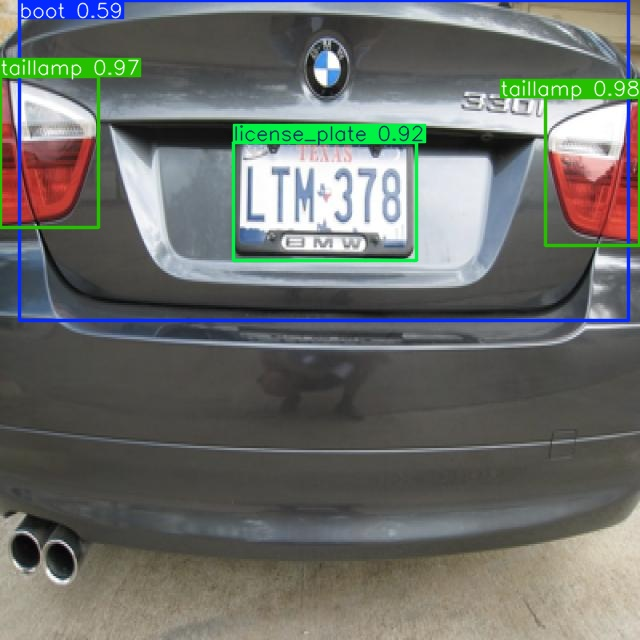

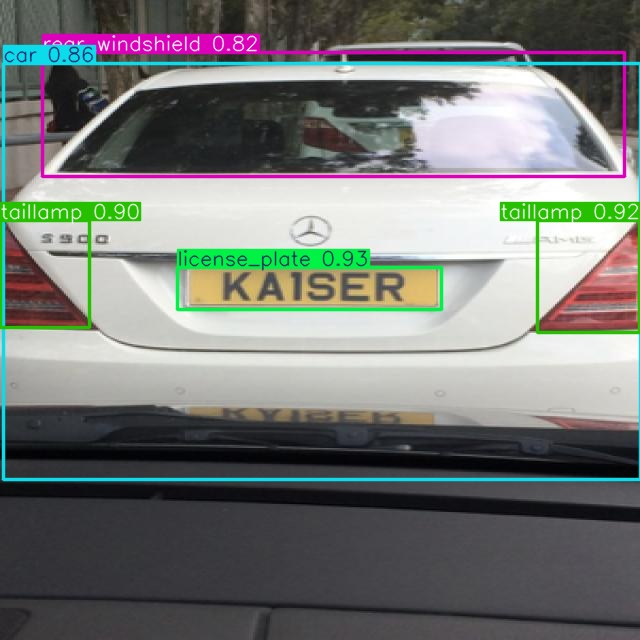

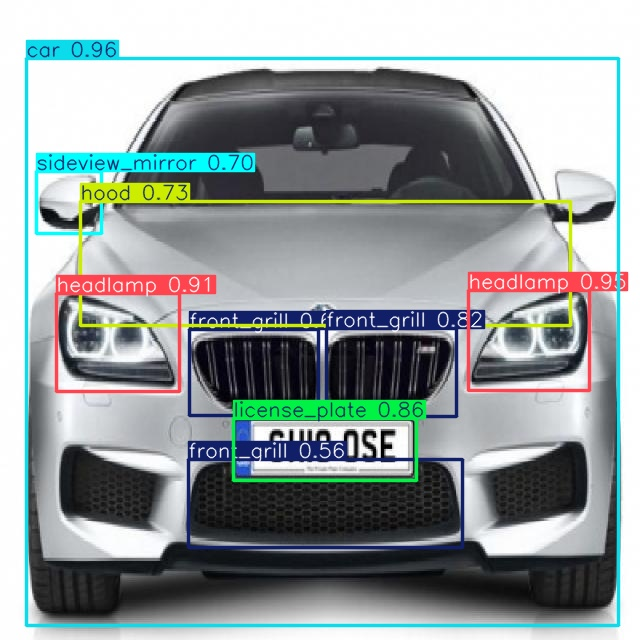

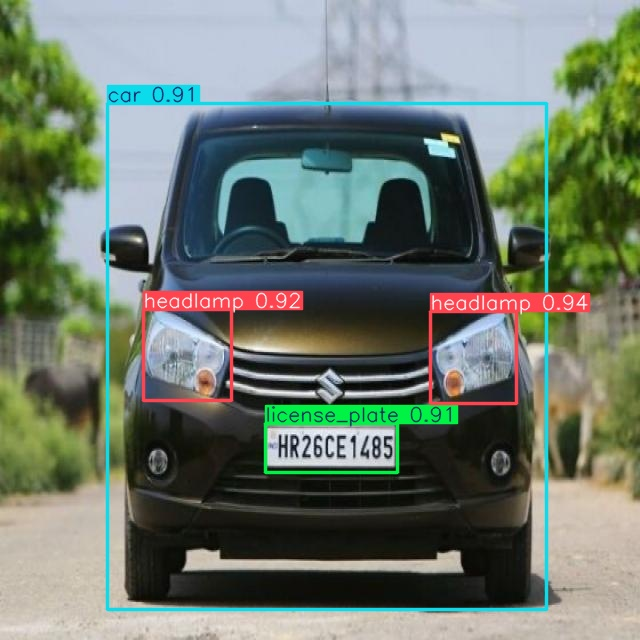

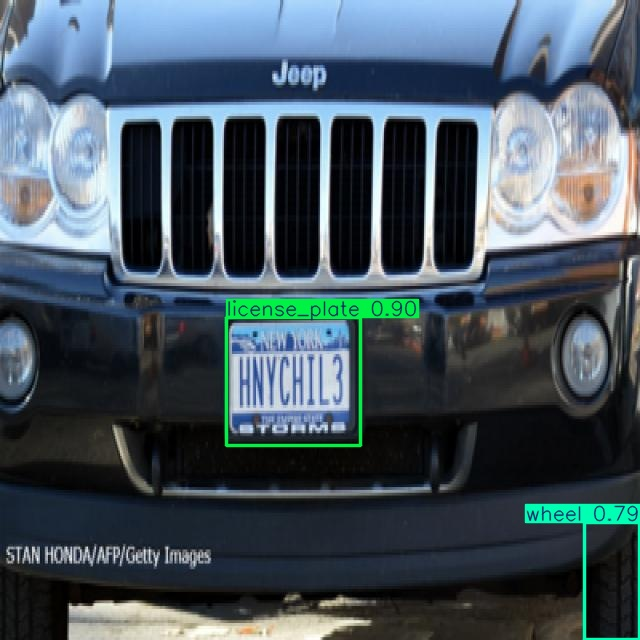

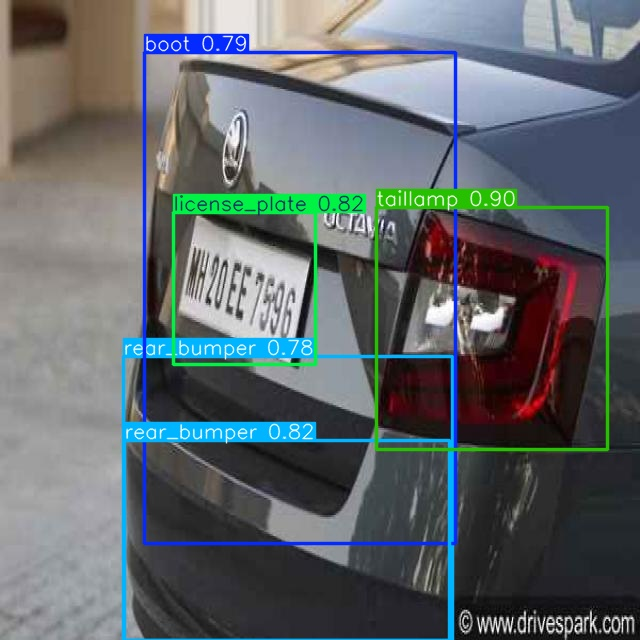

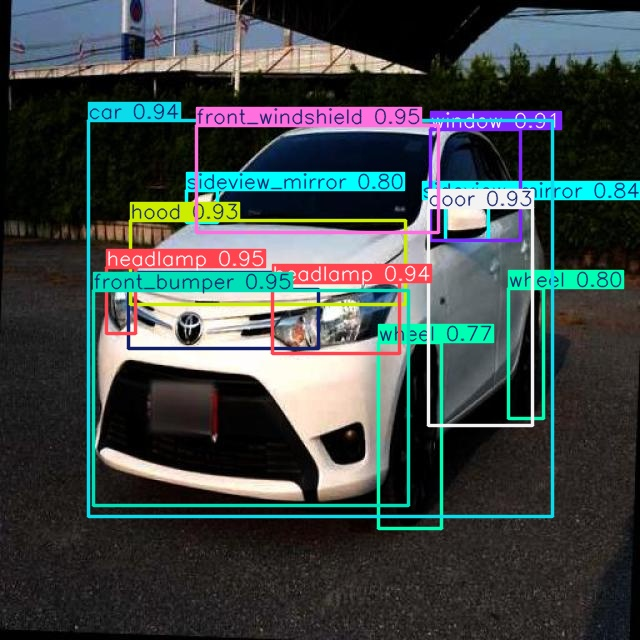

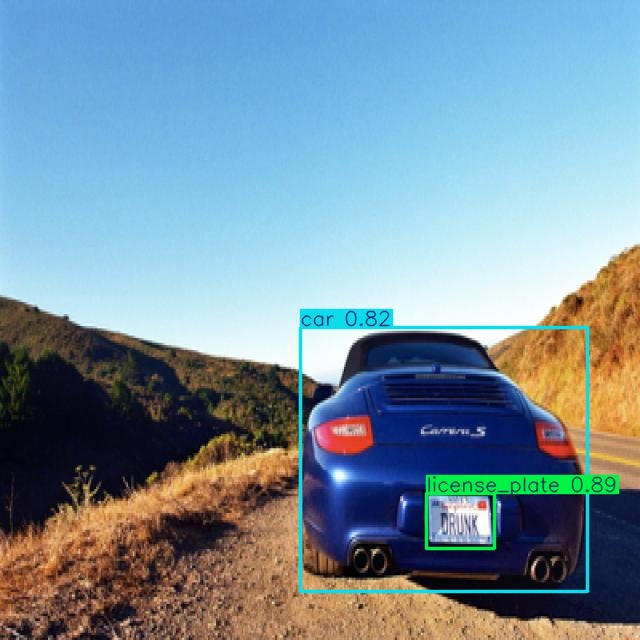

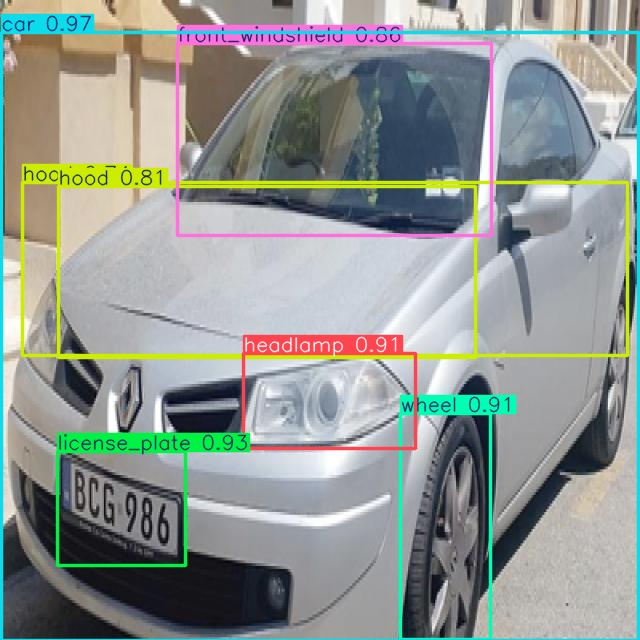

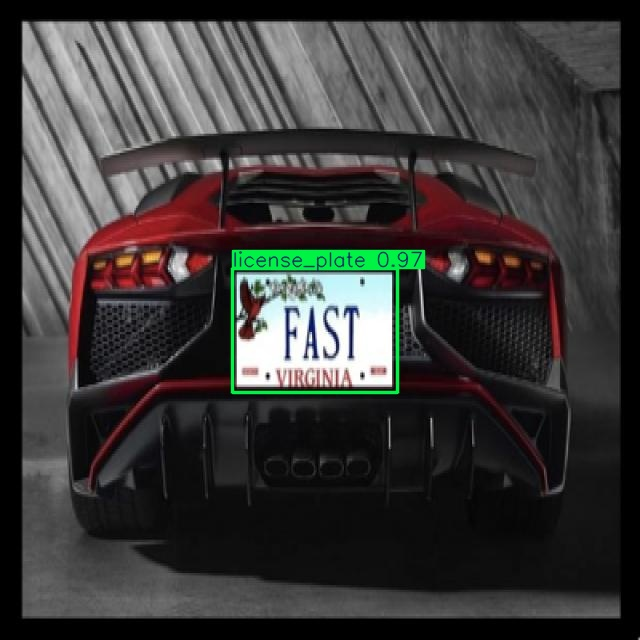

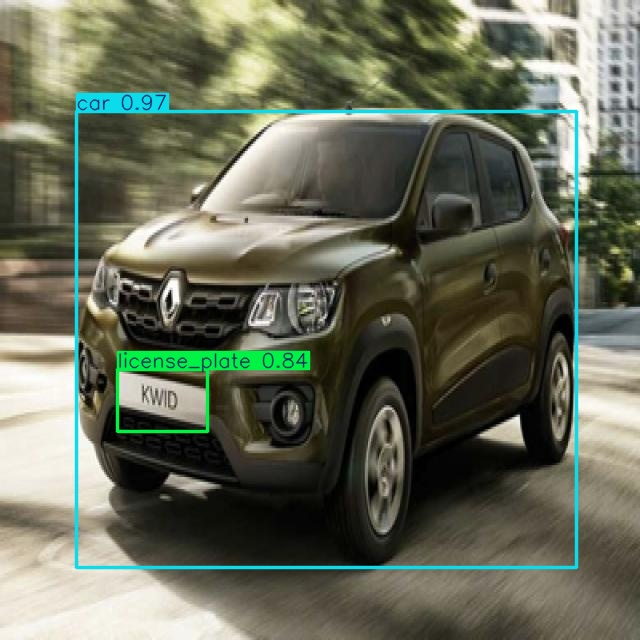

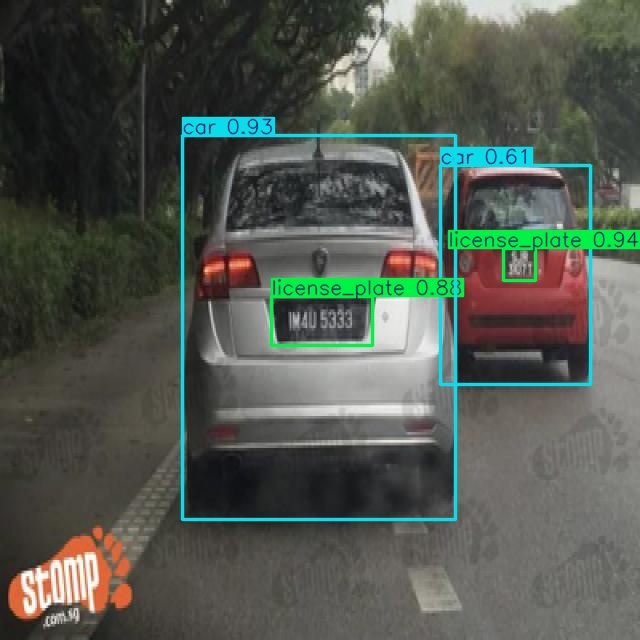

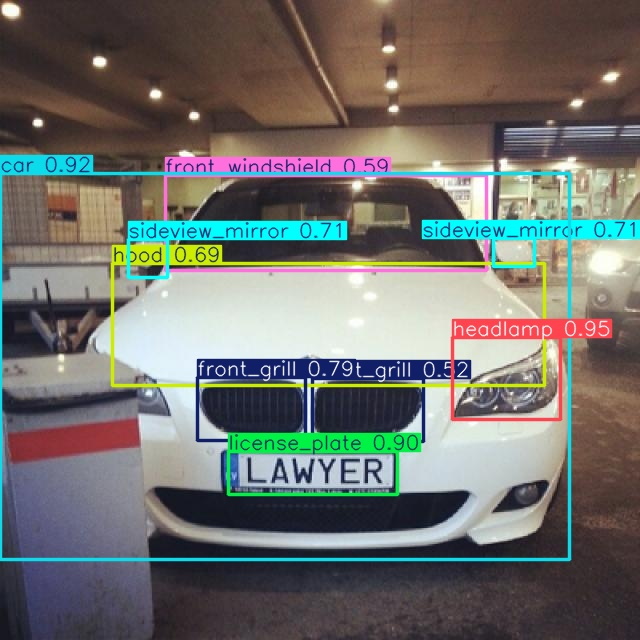

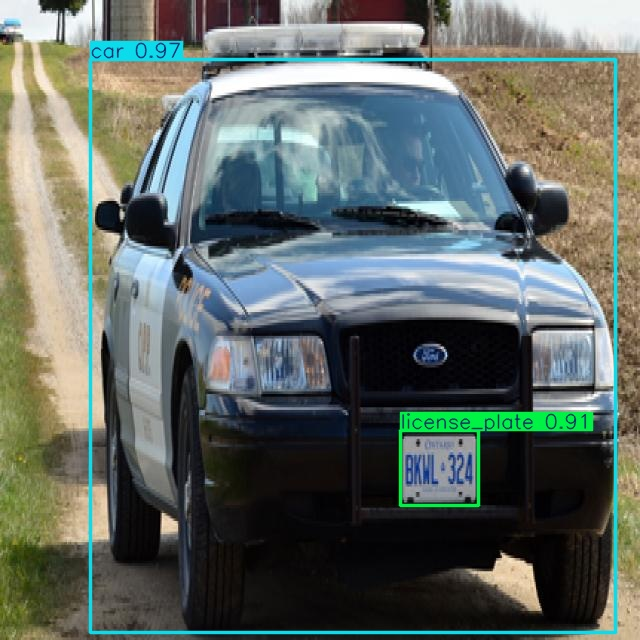

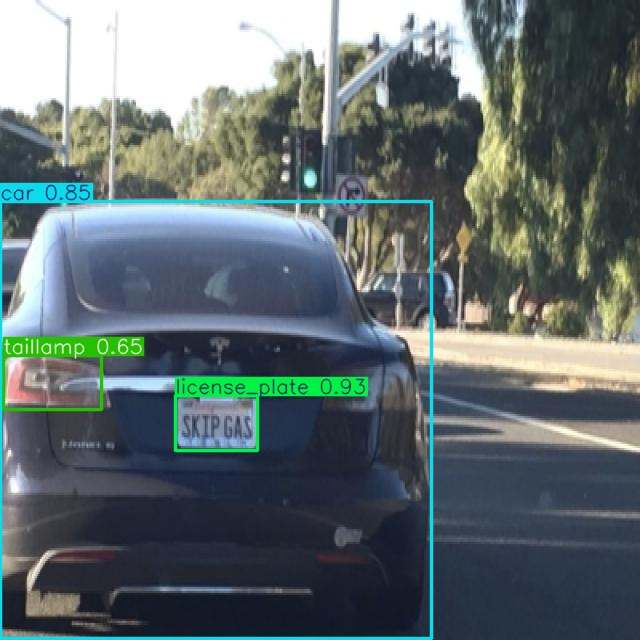

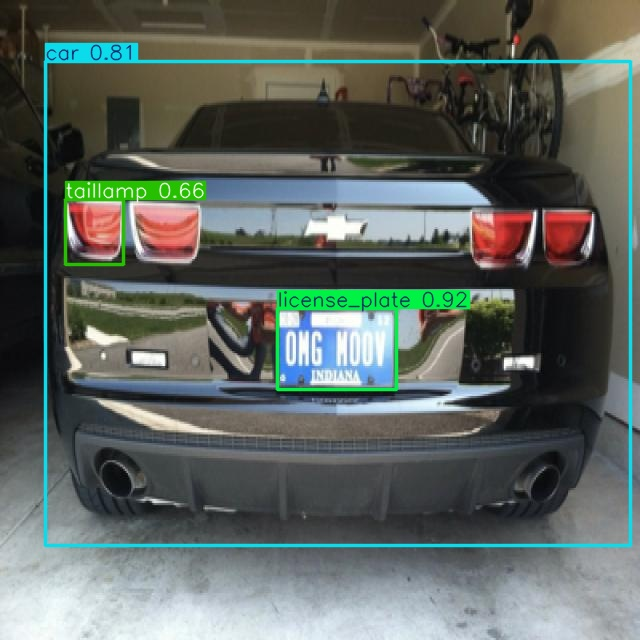

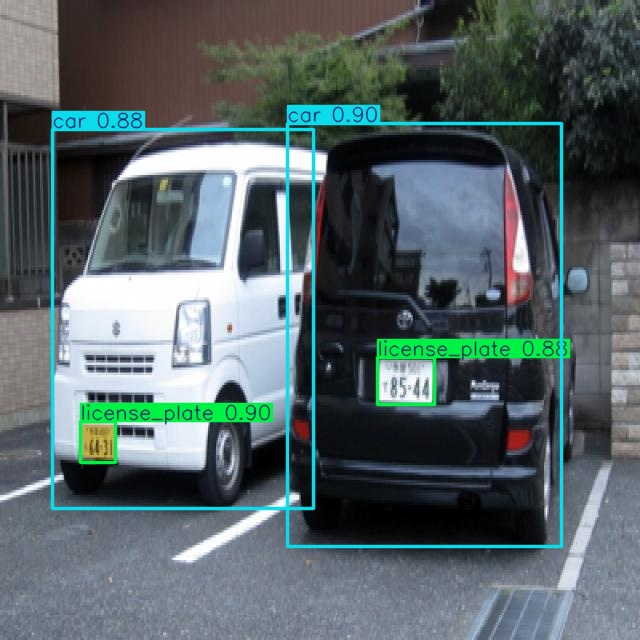

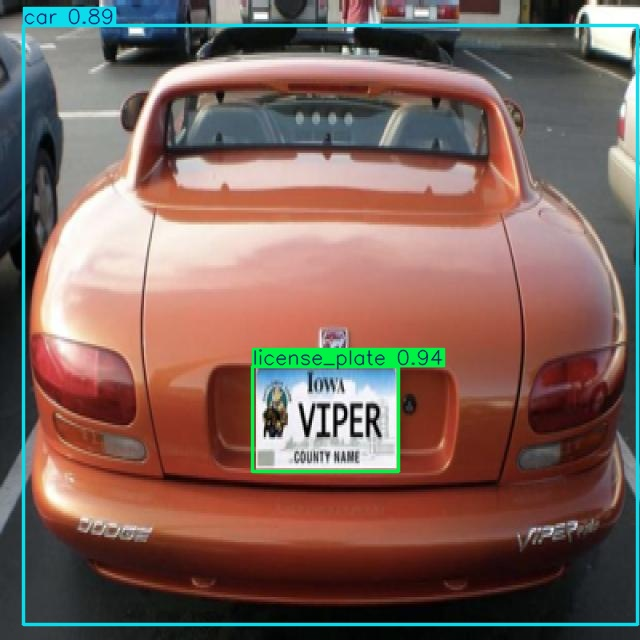

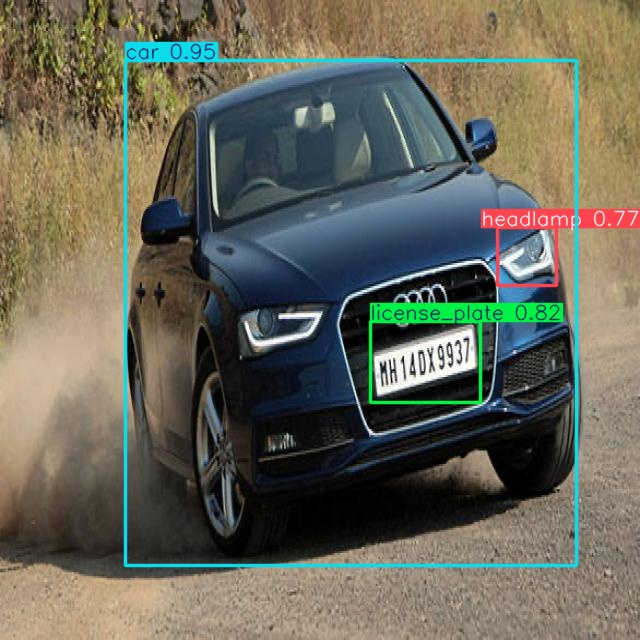

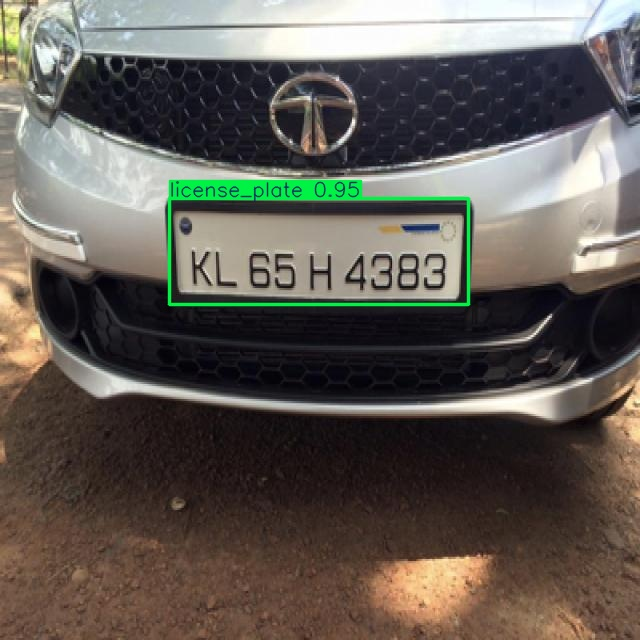

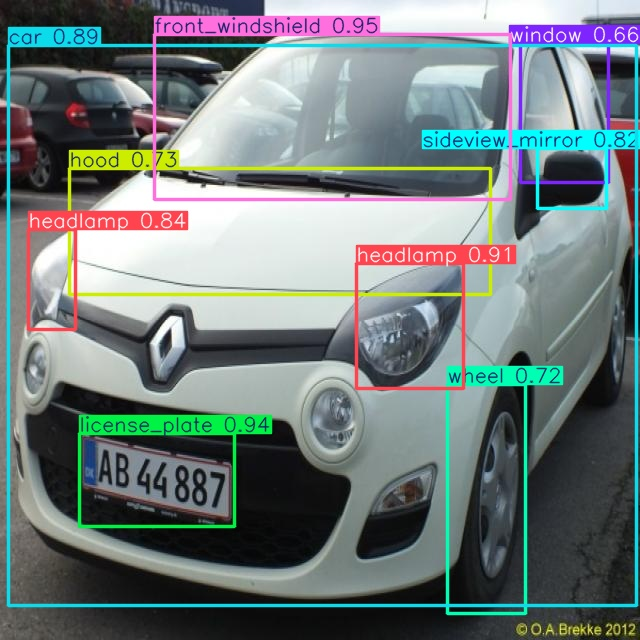

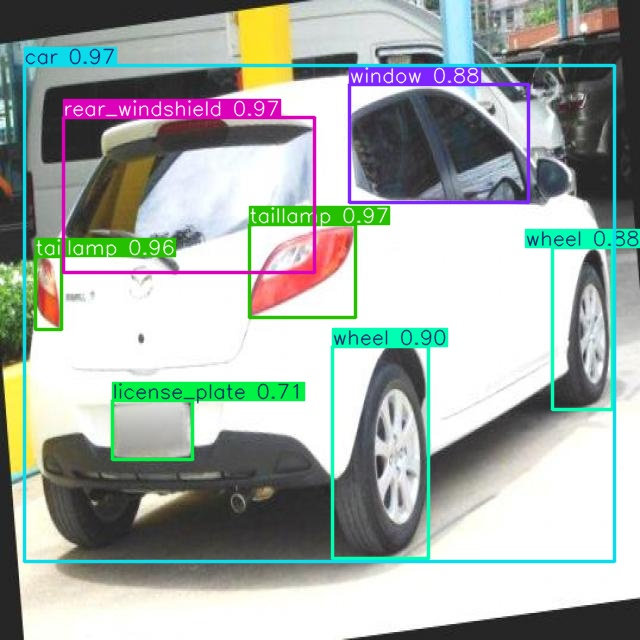

In [13]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, height=640))
      print("\n")

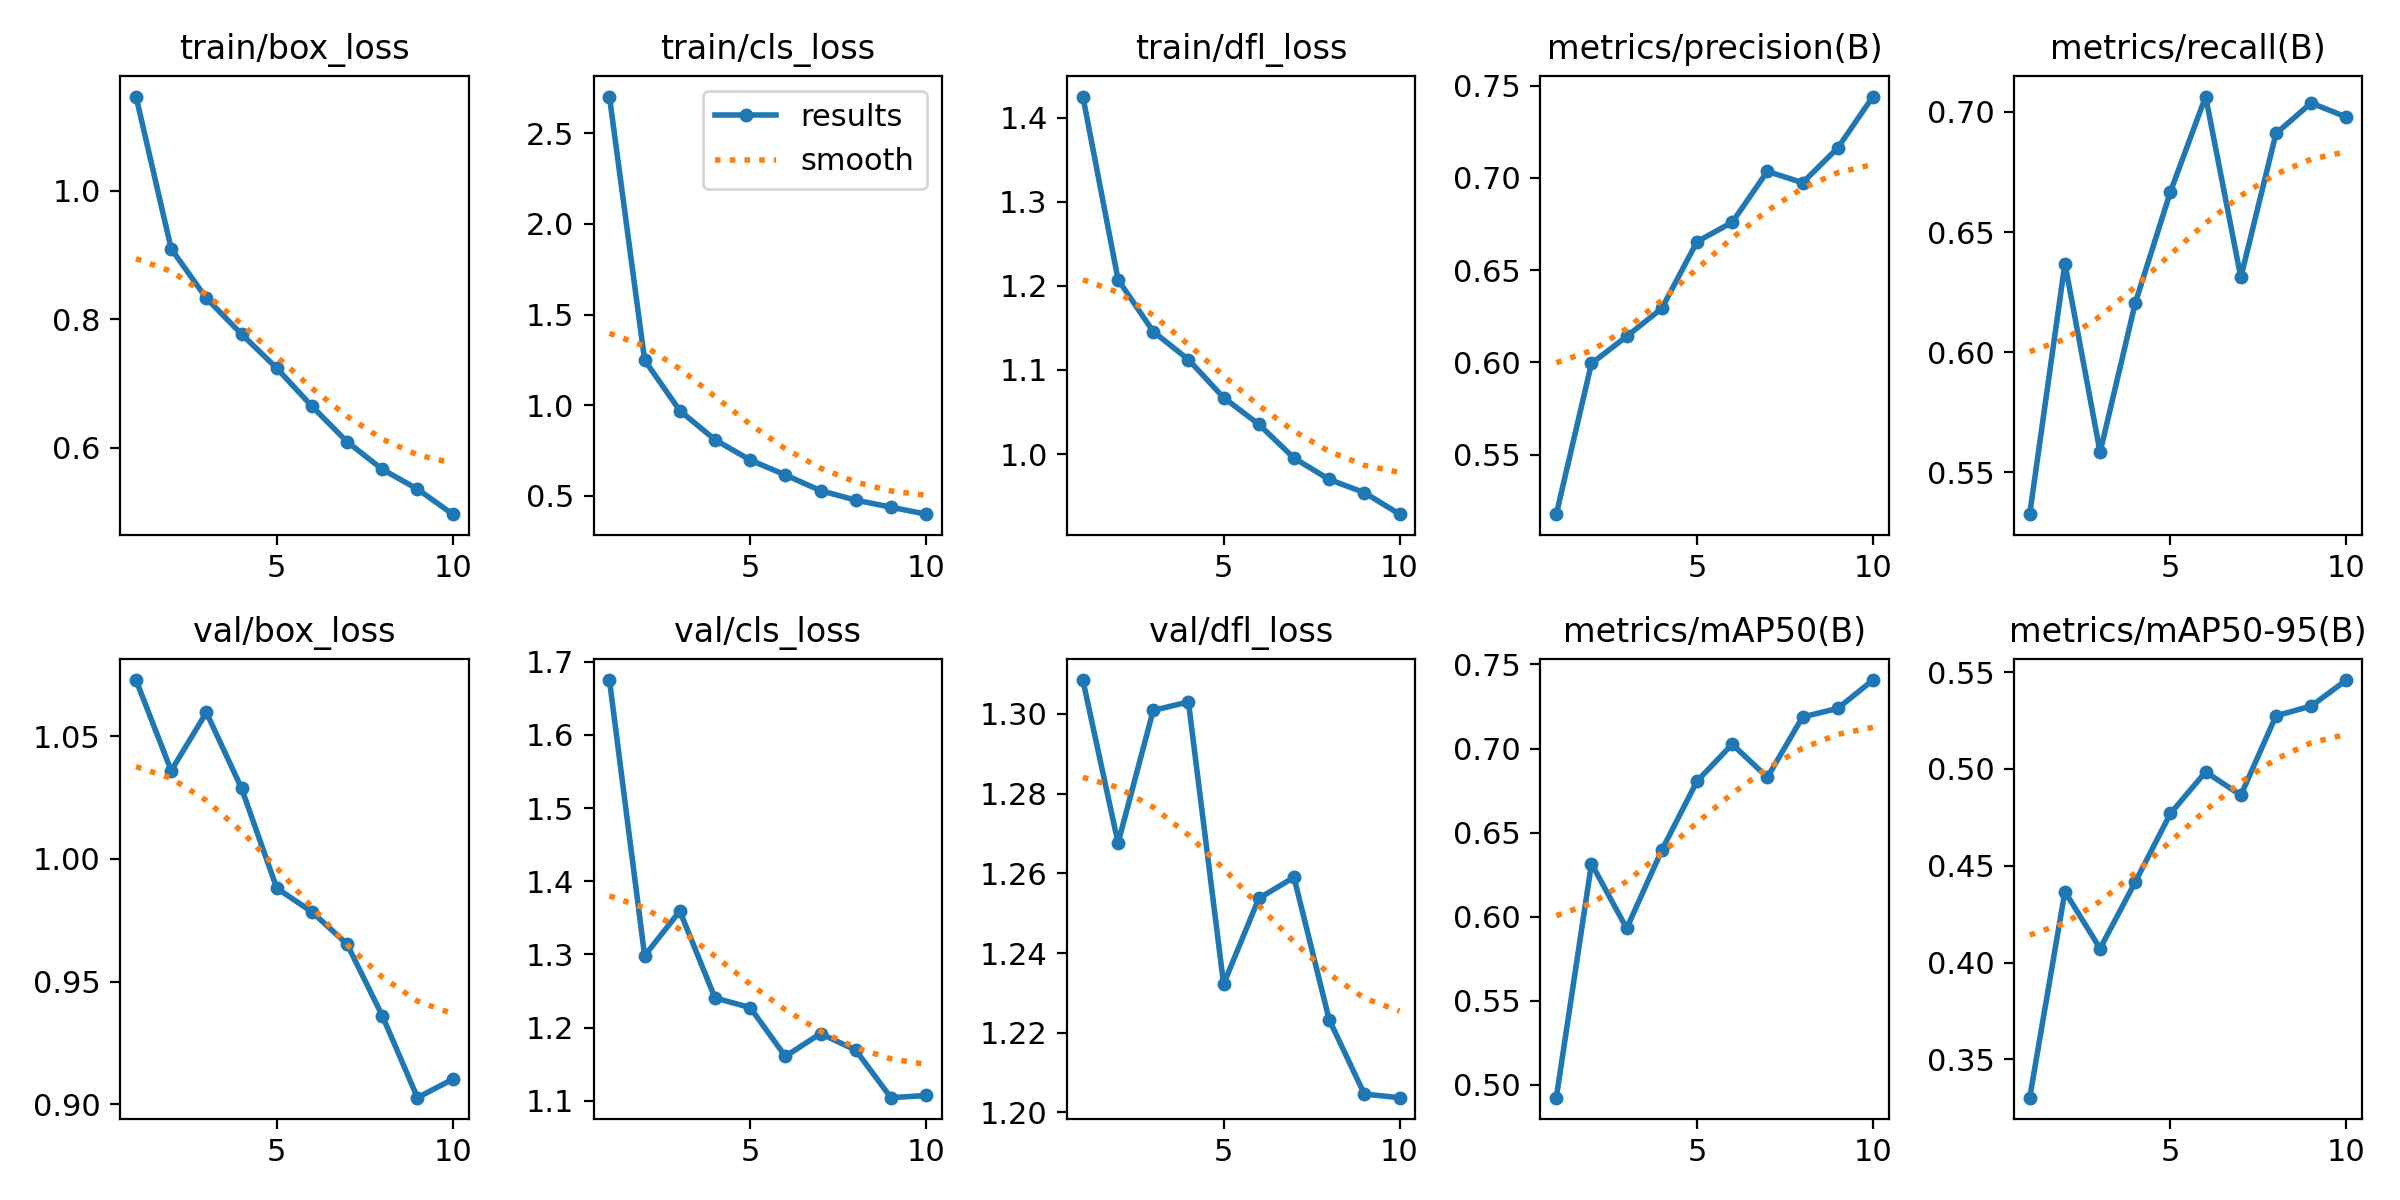

In [15]:
Image(filename=f'/content/runs/detect/train/results.png', width=640)

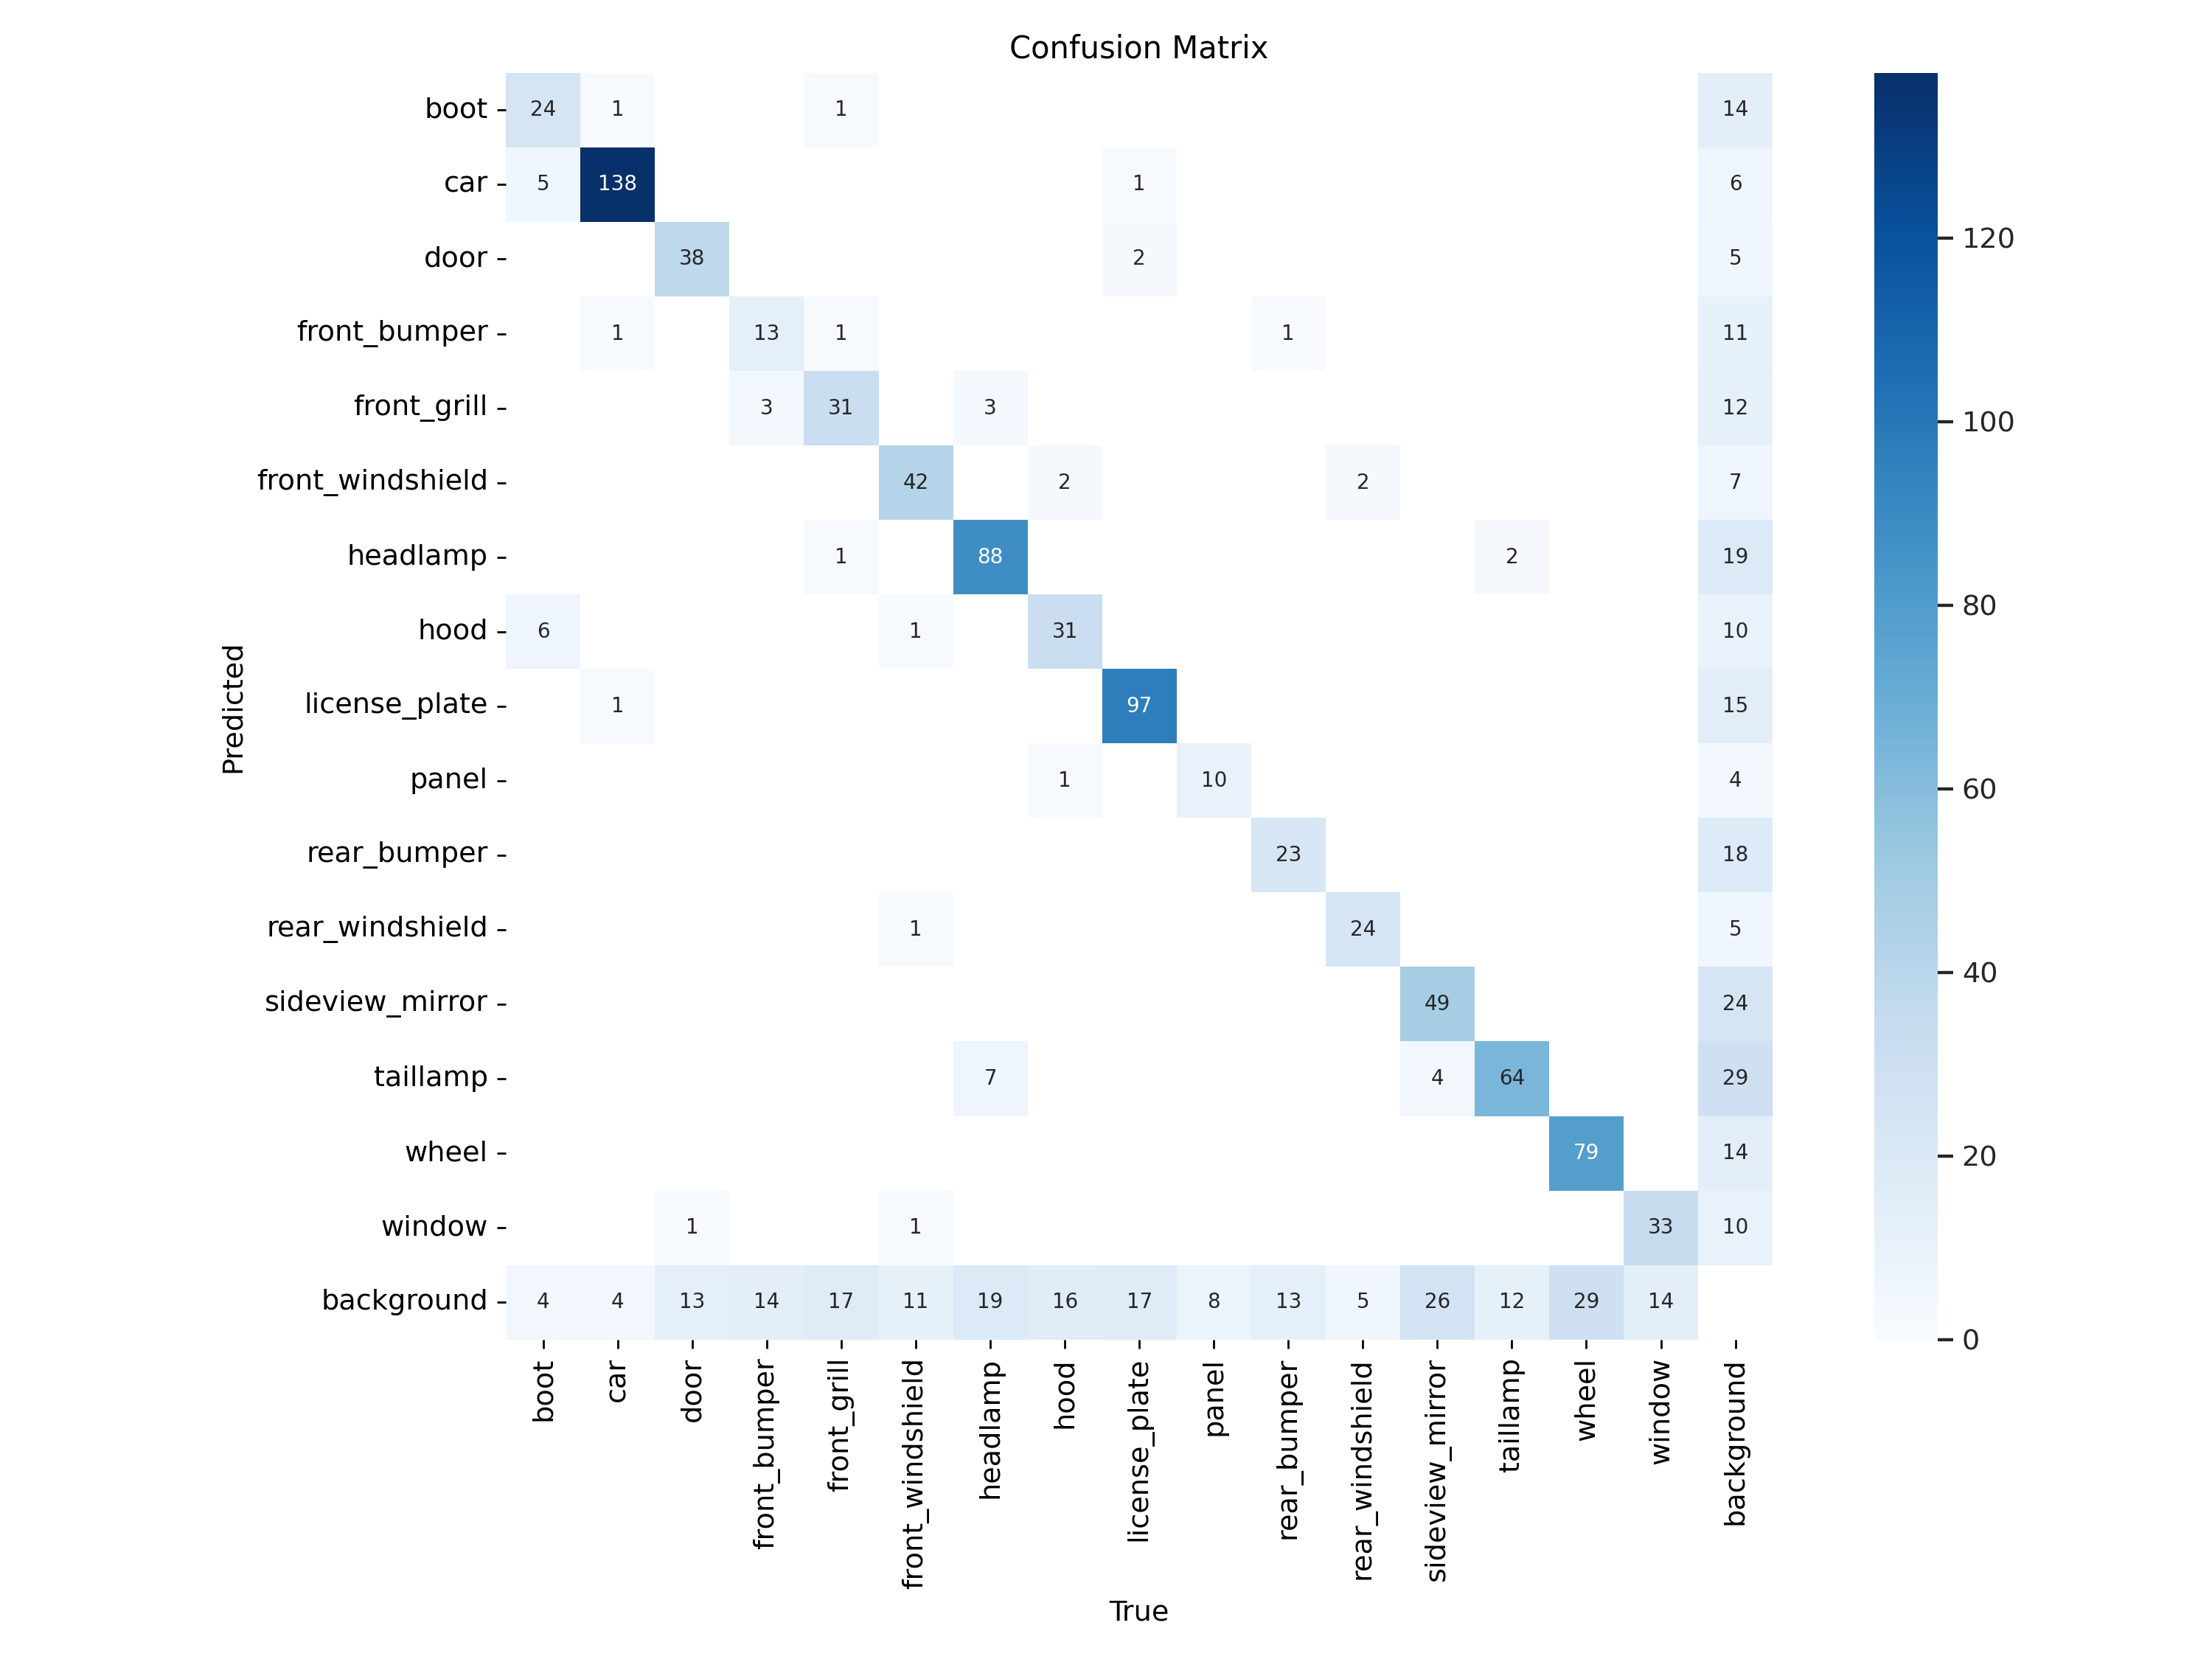

In [16]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=640)